In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-text-message-classification/SPAM text message 20170820 - Data.csv


In [6]:
# Loading Essential libraries 
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
%config Completer.use_jedi = False # this to force autocompletion 

In [7]:
df = pd.read_csv('../input/spam-text-message-classification/SPAM text message 20170820 - Data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.shape

(5572, 2)

In [10]:
# convert label to a numerical variable
df['Category'] = df.Category.map({'ham':0, 'spam':1})
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### lets do some plotting 


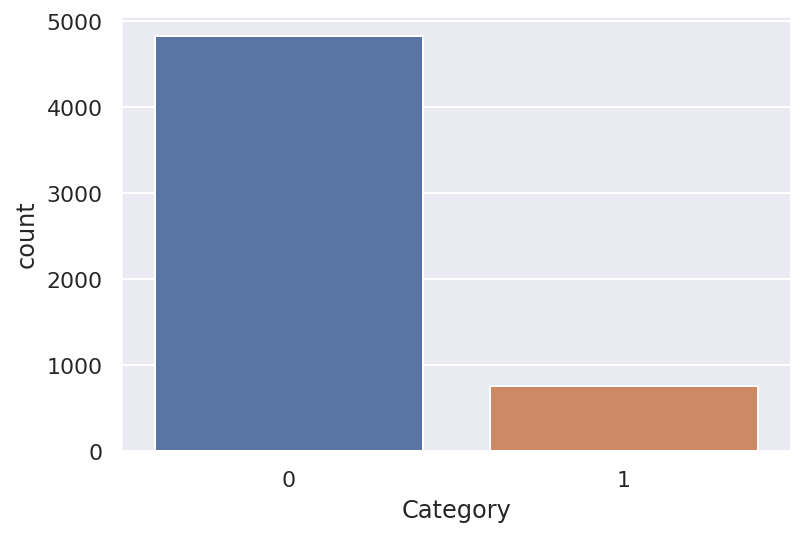

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.countplot(df.Category)
plt.show()

In [12]:
df['word_length'] = df['Message'].apply(lambda x:len(x.split()))

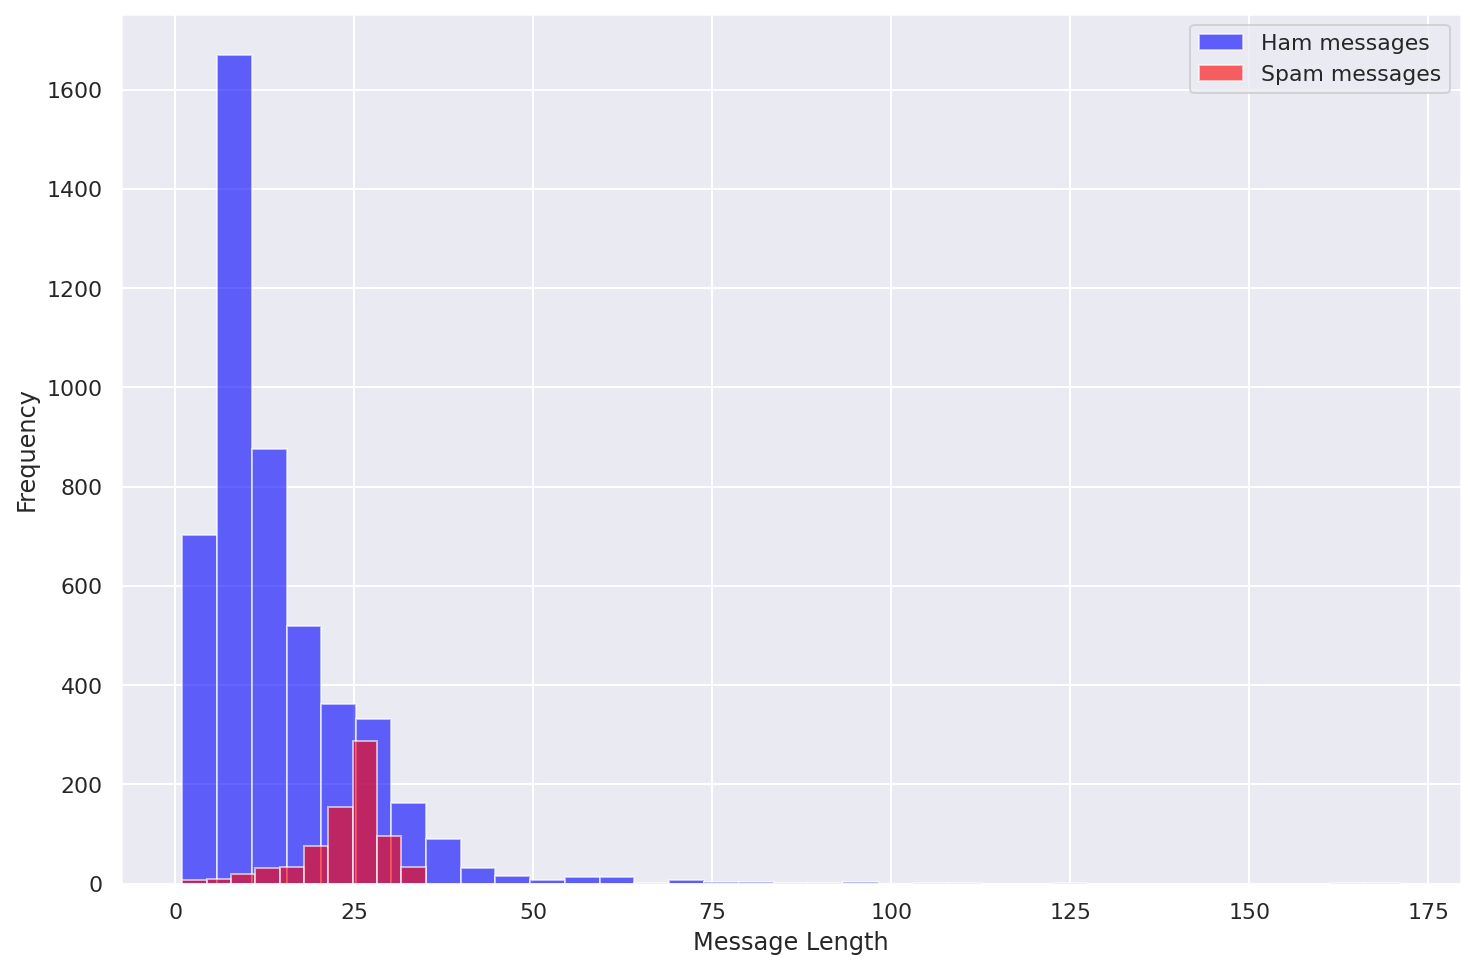

In [13]:
plt.figure(figsize=(12, 8))

df[df.Category==0].word_length.plot(bins=35, kind='hist', color='blue', 
                                       label='Ham messages', alpha=0.6)
df[df.Category == 1].word_length.plot(kind='hist', color='red', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")
plt.show()

In [14]:
df.groupby('Category').mean()

,word_length
Category,
0,14.310259
1,23.812584


In [15]:
# describing the hame(normal msgs )
df[df.Category == 0].describe()

,Category,word_length
count,4825.0,4825.000000
mean,0.0,14.310259
std,0.0,11.517945
min,0.0,1.000000
25%,0.0,7.000000
50%,0.0,11.000000
75%,0.0,19.000000
max,0.0,171.000000


In [16]:
# Describing  the spam msgs
df[df.Category == 1].describe()

,Category,word_length
count,747.0,747.000000
mean,1.0,23.812584
std,0.0,5.956923
min,1.0,1.000000
25%,1.0,22.000000
50%,1.0,25.000000
75%,1.0,28.000000
max,1.0,35.000000


**From here we can say that the longer text are more probable to become Spam msgs**

### now let do some text_preprocessing

How to use it for preprocessing

You have to have installed spacy and python3 to make it work. import text_hammer as th

def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = th.cont_exp(x)
    x = th.remove_emails(x)
    x = th.remove_urls(x)
    x = th.remove_html_tags(x)
    x = th.remove_rt(x)
    x = th.remove_accented_chars(x)
    x = th.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x



In [17]:
pip install text-hammer

     |████████████████████████████████| 115 kB 5.9 MB/s eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [18]:
import text_hammer as th

In [19]:
%%time

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

def text_preprocessing(df,col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_stopwords(x))
#     df[column] = df[column].progress_apply(lambda x:th.spelling_correction(x))
  
    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.make_base(x)) #ran -> run,
    return(df)

CPU times: user 260 µs, sys: 0 ns, total: 260 µs
Wall time: 252 µs


In [20]:
cleaned_df = text_preprocessing(df, "Message")

  0%|          | 0/5572 [00:00<?, ?it/s]

  0%|          | 0/5572 [00:00<?, ?it/s]

  0%|          | 0/5572 [00:00<?, ?it/s]

  0%|          | 0/5572 [00:00<?, ?it/s]

  0%|          | 0/5572 [00:00<?, ?it/s]

  0%|          | 0/5572 [00:00<?, ?it/s]

  0%|          | 0/5572 [00:00<?, ?it/s]

  0%|          | 0/5572 [00:00<?, ?it/s]

In [21]:
cleaned_df.Message

0       jurong point crazy available bugis great world...
1                                   ok lar joking wif oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                                     dun early hor c say
4                                   nah think go usf life
                              ...                        
5567    2nd time try 2 contact you win 750 pound prize...
5568                             u b go esplanade fr home
5569                      pity mood that soany suggestion
5570    guy bitching act like interested buying week g...
5571                             rolling floor laugh true
Name: Message, Length: 5572, dtype: object

## Now lets do some EDA

In [22]:
import nltk



### Calculating the word frequency by using nltk
words_list = []
for sentence in cleaned_df.Message:
    words_list.extend(nltk.word_tokenize(sentence))
freq_dist = nltk.FreqDist(words_list)
freq_dist.most_common(20)
# freq_dist.keys()

[('2', 481),
 ('you', 453),
 ('not', 400),
 ('go', 353),
 ('come', 327),
 ('get', 325),
 ('do', 303),
 ('4', 293),
 ('know', 287),
 ('ok', 278),
 ('free', 276),
 ('good', 276),
 ('send', 273),
 ('like', 252),
 ('want', 243),
 ('day', 242),
 ('time', 238),
 ('love', 234),
 ('now', 231),
 ('text', 212)]

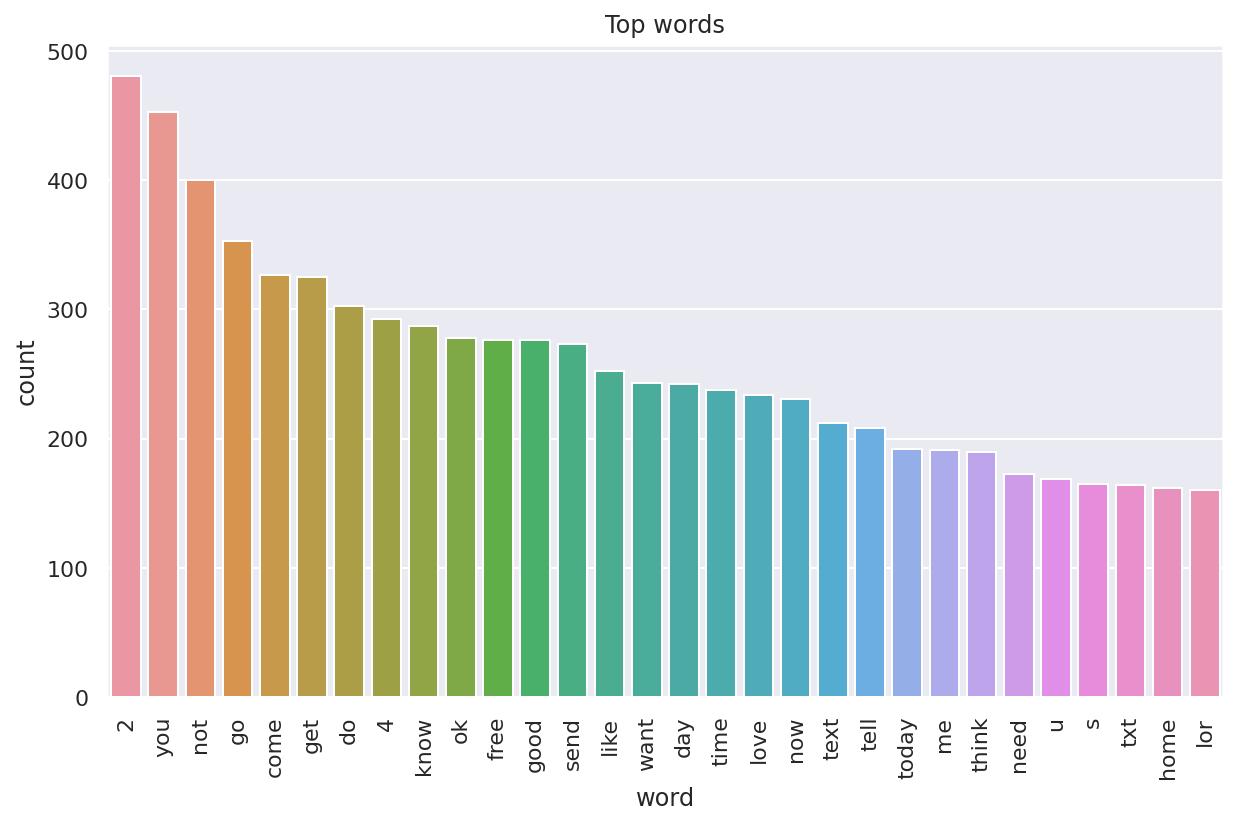

In [23]:
temp = pd.DataFrame(freq_dist.most_common(30),  columns=['word', 'count'])
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=temp, ax=ax)
plt.title("Top words")
plt.xticks(rotation='vertical');

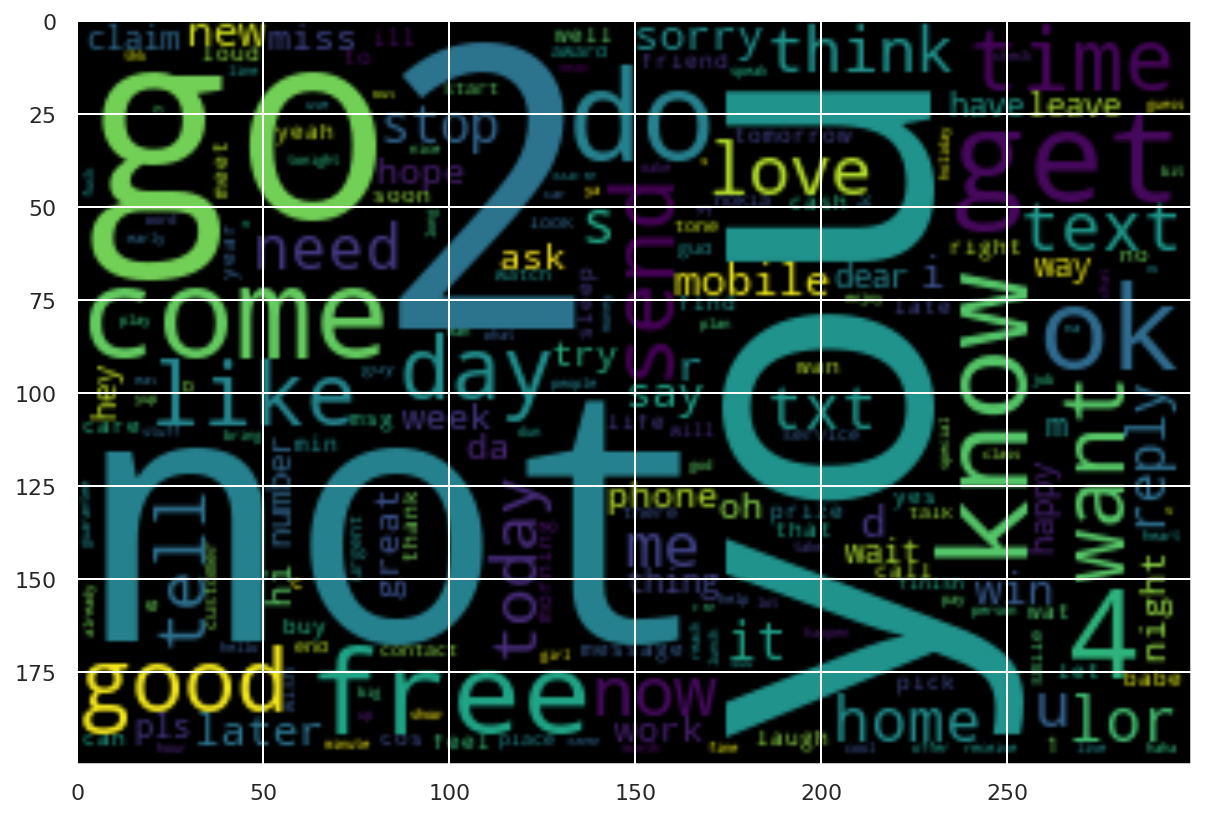

In [24]:
### Creating wordcloud
from wordcloud import WordCloud
import wordcloud
# creation of wordcloud
wcloud_fig = WordCloud( stopwords=set(wordcloud.STOPWORDS),
                      colormap='viridis', width=300, height=200).generate_from_frequencies(freq_dist)

# plotting the wordcloud
plt.figure(figsize=(10,7), frameon=True)

plt.imshow(wcloud_fig, interpolation  = 'bilinear')
plt.show()

### Module 2 
#### till now we have done all text cleaning and plottting part 

#### now lets split our data for some training and testing 

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(cleaned_df.Message, cleaned_df.Category, test_size = 0.2, stratify = cleaned_df.Category
                                                 ,random_state = 42)

### Using The tokenizer Class to convert the sentences into word vectors¶


In [26]:
from keras.preprocessing.text import Tokenizer
num_words = 10000 # this means 15000 unique words can be taken 
tokenizer=Tokenizer(num_words,lower=True)
df_total = pd.concat([X_train, X_test], axis = 0)
tokenizer.fit_on_texts(df_total)


In [27]:
len(tokenizer.word_index) # this is whole unique words in our corpus
# but we have taken 10000 but we have only 8502 and the rest will be zero

8502

In [28]:
cleaned_df.word_length.max()

171

In [29]:
from keras.preprocessing.sequence import pad_sequences

X_train_ =tokenizer.texts_to_sequences(X_train)
X_train_pad=pad_sequences(X_train_,maxlen=171,padding='post')
X_test_ = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_, maxlen = 171, padding = 'post')


In [30]:
print(X_train_pad.shape,X_test_pad.shape) # this is our 2D matrix we can take this as Input data

(4457, 171) (1115, 171)


### Now lets design our Deep learning model to train our data

### Method1: by using solely embedding layers

In [31]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Embedding,Bidirectional
import tensorflow
from tensorflow.compat.v1.keras.layers import CuDNNLSTM,CuDNNGRU
from tensorflow.keras.layers import Dropout

In [32]:
EMBEDDING_DIM = 100 # this means the embedding layer will create  a vector in 100 dimension
model = Sequential()
model.add(Embedding(input_dim = num_words,# the whole vocabulary size 
                          output_dim = EMBEDDING_DIM, # vector space dimension
                          input_length= X_train_pad.shape[1] # max_len of text sequence
                          ))
model.add(Dropout(0.2))
model.add(Bidirectional(CuDNNLSTM(100,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(CuDNNLSTM(200,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(CuDNNLSTM(100,return_sequences=False)))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam',metrics = 'accuracy')

In [33]:
#EarlyStopping and ModelCheckpoint

from keras.callbacks import EarlyStopping, ModelCheckpoint


es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)
mc = ModelCheckpoint('./model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [34]:
history_embedding = model.fit(X_train_pad,y_train, epochs = 35, batch_size = 120, validation_data=(X_test_pad, y_test),verbose = 1, callbacks= [es, mc]  )


Epoch 1/35
38/38 [==============================] - 28s 437ms/step - loss: 0.3776 - accuracy: 0.8768 - val_loss: 0.0794 - val_accuracy: 0.9803

Epoch 00001: val_accuracy improved from -inf to 0.98027, saving model to ./model.h5
Epoch 2/35
38/38 [==============================] - 4s 118ms/step - loss: 0.0316 - accuracy: 0.9924 - val_loss: 0.0598 - val_accuracy: 0.9830

Epoch 00002: val_accuracy improved from 0.98027 to 0.98296, saving model to ./model.h5
Epoch 3/35
38/38 [==============================] - 4s 118ms/step - loss: 0.0171 - accuracy: 0.9959 - val_loss: 0.0824 - val_accuracy: 0.9830

Epoch 00003: val_accuracy did not improve from 0.98296
Epoch 4/35
38/38 [==============================] - 4s 118ms/step - loss: 0.0065 - accuracy: 0.9983 - val_loss: 0.1504 - val_accuracy: 0.9776

Epoch 00004: val_accuracy did not improve from 0.98296
Epoch 5/35
38/38 [==============================] - 4s 118ms/step - loss: 0.0172 - accuracy: 0.9975 - val_loss: 0.0784 - val_accuracy: 0.9848

Epo

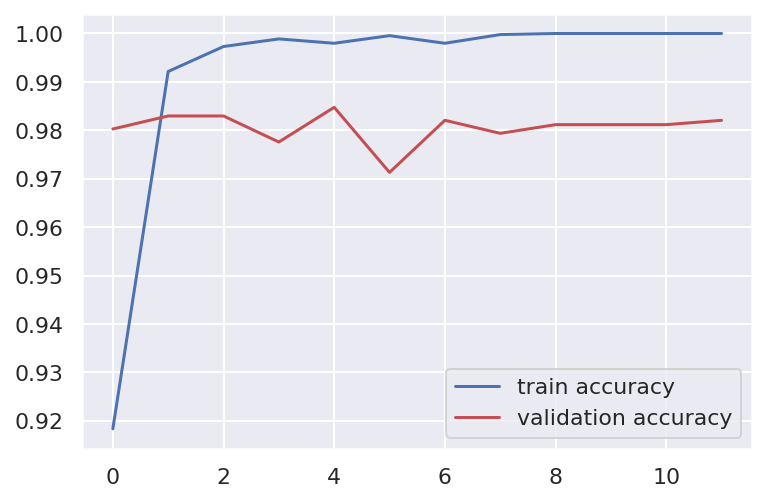

In [35]:
plt.plot(history_embedding.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_embedding.history['val_accuracy'],c='r',label='validation accuracy')
plt.legend(loc='lower right')
plt.show()


#### the maximum accurary we have got with wordembedding is 98 with some overfitting  now we would try with word2vec

### Method 2: Using word2vec **i'm gonna use gensim **

In [37]:
import gensim.downloader as api
glove_gensim  = api.load('glove-wiki-gigaword-100') # this would download vector with 100 dimension

[==================================================] 100.0% 128.1/128.1MB downloaded


In [40]:
glove_gensim['cat'].shape[0] # this is the diemnsion of the vectors

100

In [39]:
# now lets connvert all the words we have in our data into vectors 
vector_size = 100
gensim_weight_matrix = np.zeros((num_words ,vector_size))
gensim_weight_matrix.shape

for word, index in tokenizer.word_index.items():
    if index < num_words: # since index starts with zero 
        if word in glove_gensim.wv.vocab:
            gensim_weight_matrix[index] = glove_gensim[word]
        else:
            gensim_weight_matrix[index] = np.zeros(100)

In [41]:
gensim_weight_matrix.shape

(10000, 100)

In [42]:
# designing our architecture 
EMBEDDING_DIM = 100 # this means the embedding layer will create  a vector in 100 dimension
model_gensim = Sequential()
model_gensim.add(Embedding(input_dim = num_words,# the whole vocabulary size 
                          output_dim = EMBEDDING_DIM, # vector space dimension
                          input_length= X_train_pad.shape[1], # max_len of text sequence
                          weights = [gensim_weight_matrix],trainable = False))
model_gensim.add(Dropout(0.2))
model_gensim.add(Bidirectional(CuDNNLSTM(100,return_sequences=True)))
model_gensim.add(Dropout(0.2))
model_gensim.add(Bidirectional(CuDNNLSTM(200,return_sequences=True)))
model_gensim.add(Dropout(0.2))
model_gensim.add(Bidirectional(CuDNNLSTM(100,return_sequences=False)))
model_gensim.add(Dense(1, activation = 'sigmoid'))
model_gensim.compile(loss = 'binary_crossentropy', optimizer = 'adam',metrics = 'accuracy')

In [43]:
model_gensim.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 171, 100)          1000000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 171, 100)          0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 171, 200)          161600    
_________________________________________________________________
dropout_4 (Dropout)          (None, 171, 200)          0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 171, 400)          643200    
_________________________________________________________________
dropout_5 (Dropout)          (None, 171, 400)          0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 200)              

In [44]:
from keras.callbacks import EarlyStopping, ModelCheckpoint


es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('./model_gensim.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [45]:
history_gensim = model_gensim.fit(X_train_pad,y_train, epochs = 25, batch_size = 120, validation_data=(X_test_pad, y_test),verbose = 1, callbacks= [es, mc]  )


Epoch 1/25
38/38 [==============================] - 9s 131ms/step - loss: 0.3660 - accuracy: 0.8361 - val_loss: 0.1585 - val_accuracy: 0.9417

Epoch 00001: val_accuracy improved from -inf to 0.94170, saving model to ./model_gensim.h5
Epoch 2/25
38/38 [==============================] - 4s 112ms/step - loss: 0.1067 - accuracy: 0.9685 - val_loss: 0.1319 - val_accuracy: 0.9632

Epoch 00002: val_accuracy improved from 0.94170 to 0.96323, saving model to ./model_gensim.h5
Epoch 3/25
38/38 [==============================] - 4s 112ms/step - loss: 0.0991 - accuracy: 0.9660 - val_loss: 0.1005 - val_accuracy: 0.9605

Epoch 00003: val_accuracy did not improve from 0.96323
Epoch 4/25
38/38 [==============================] - 4s 112ms/step - loss: 0.0914 - accuracy: 0.9717 - val_loss: 0.0828 - val_accuracy: 0.9704

Epoch 00004: val_accuracy improved from 0.96323 to 0.97040, saving model to ./model_gensim.h5
Epoch 5/25
38/38 [==============================] - 4s 111ms/step - loss: 0.0926 - accuracy: 0

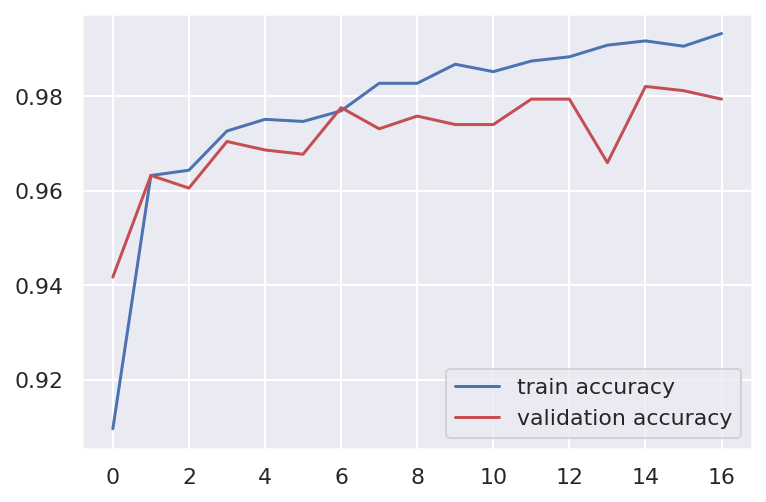

In [46]:
# lets draw learning curve 

plt.plot(history_gensim.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_gensim.history['val_accuracy'],c='r',label='validation accuracy')
plt.legend(loc='lower right')
plt.show()


### **model trained with word2vec is more generalised model so we will choose that as our final model **

In [47]:
model_gensim.evaluate(X_test_pad, y_test) 


35/35 [==============================] - 12s 186ms/step - loss: 0.0803 - accuracy: 0.9794


[0.08025669306516647, 0.9793722033500671]

In [48]:
model.evaluate(X_test_pad, y_test)

35/35 [==============================] - 1s 26ms/step - loss: 0.1356 - accuracy: 0.9821


[0.13560336828231812, 0.9820627570152283]

### Model Evaluation

In [49]:
y_pred = np.where(model.predict(X_test_pad)>.5,1,0)

In [50]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       978
           1       0.89      0.97      0.93       137

    accuracy                           0.98      1115
   macro avg       0.94      0.98      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [51]:
y_pred_gensim = np.where(model_gensim.predict(X_test_pad)>0.5,1,0)
print(metrics.classification_report(y_pred_gensim, y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       981
           1       0.87      0.97      0.92       134

    accuracy                           0.98      1115
   macro avg       0.93      0.98      0.95      1115
weighted avg       0.98      0.98      0.98      1115



### Now lets test our model with real data

In [59]:
def predict(sentence):
    sentence_lst=[]
    sentence_lst.append(sentence)
    sentence_seq=tokenizer.texts_to_sequences(sentence_lst)
    sentence_padded=pad_sequences(sentence_seq,maxlen=171,padding='post')
    probability = (model_gensim.predict(sentence_padded))[0][0]
    if probability > 0:
        print(f'Spam | {np.round(probability*100,2)}%')
    else:
        print(f'Normal | {100 - (np.round(probability*100,2))}%')


In [53]:
predict(str(input('Enter the Sentence:')))

Enter the Sentence: FreeMsg Hey there darling it's been


Normal | 99.94%


In [60]:
predict(str(input('Enter the Sentence:')))

Enter the Sentence: Had your mobile


Spam | 0.27%
